<a href="https://colab.research.google.com/github/mohitsshetty986/Mini-Projects/blob/master/Image_Scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A python Image scraper**

In [1]:
from bs4 import BeautifulSoup as bs
import requests

In [2]:
input1=input("Search image: ")

Search image: interstellar


### **We have used Wallpaperflare website to scrape images**

In [3]:
url = "https://www.wallpaperflare.com/search?wallpaper={}&page=1".format(input1)

### **using BeautifulSoup to get the HTML code of the URL site**

In [10]:
soup = bs(requests.get(url).content, "html5lib")

#soup

### **We don't want the entire code to scrape images. Let's get the specific tag or the class that stores the image URL**

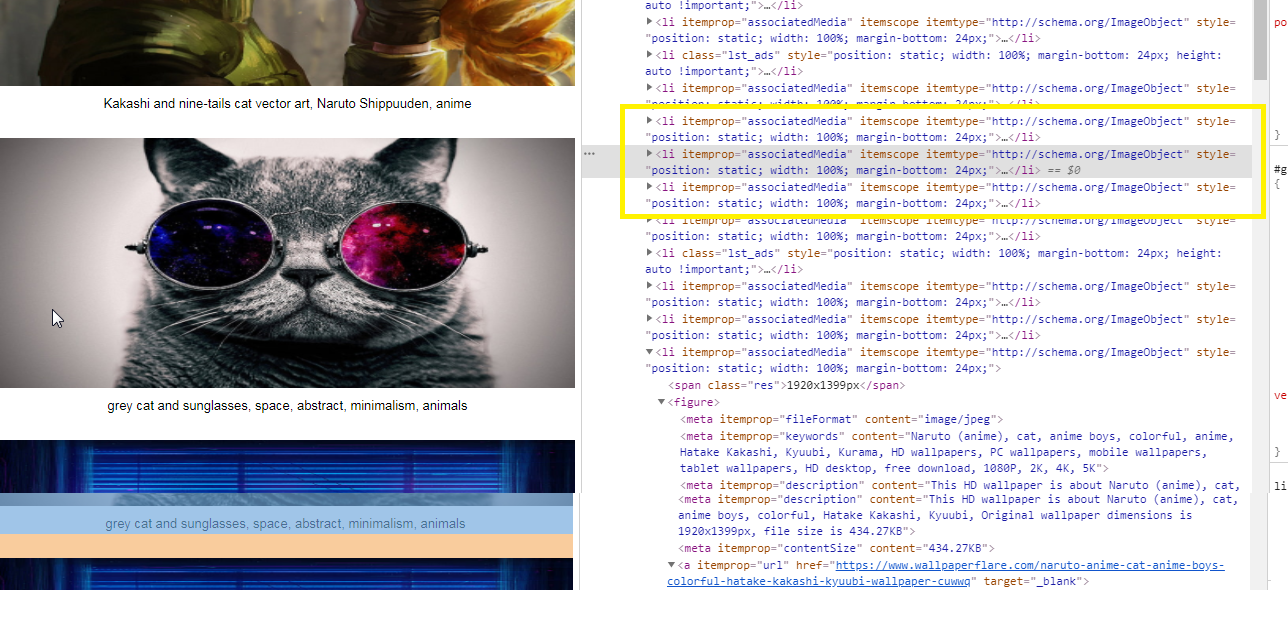

In [11]:
images = soup.findAll("li", {"itemprop":"associatedMedia"})

#images

### **If you notice we have data-src elements with url content but it will give us unoriginal images with smaller resolution. So to get the original image we will go further to another site. For that we extract the URL elements from href**

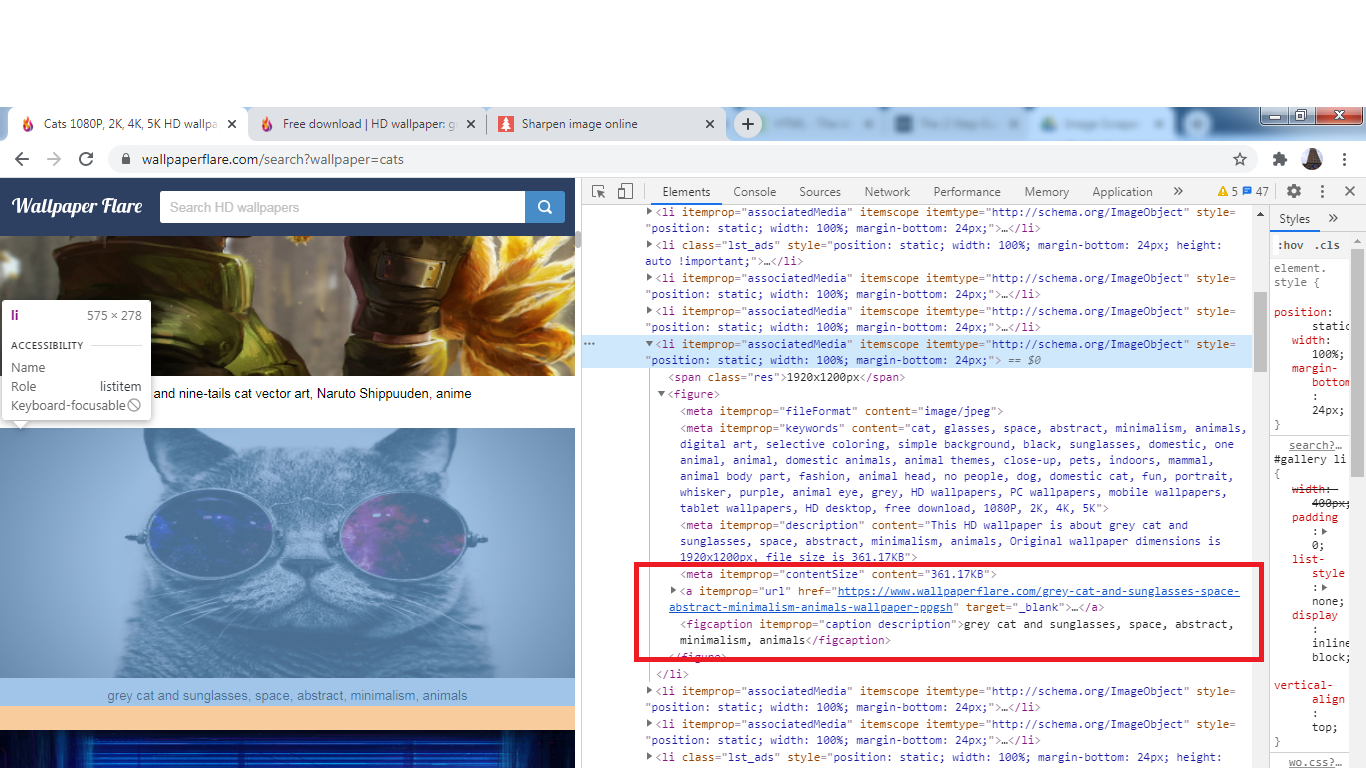

In [12]:
url_list=[]
for i in images:
  img_url=i.find("a",{"itemprop":"url"})['href']
  url_list.append(img_url)
#url_list

### **We will go to the final site by adding a string '/download/' to get the original image to each of the above urls**

Then we will again use BeautifulSoup to get the url contents of final images.

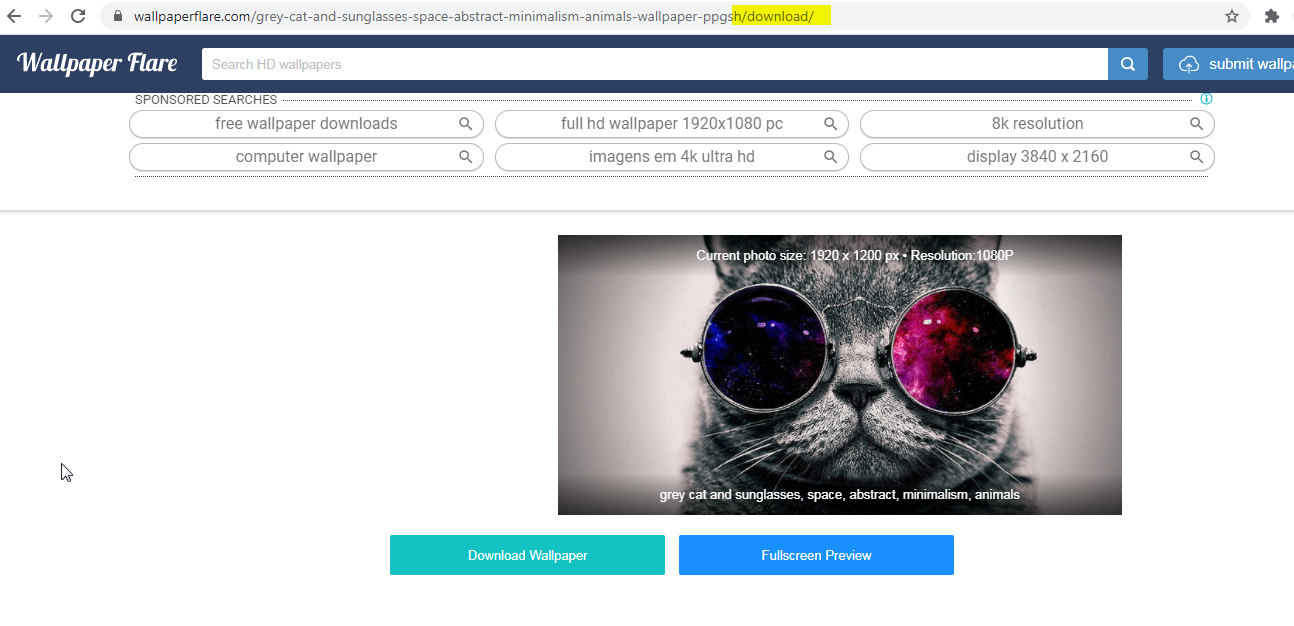

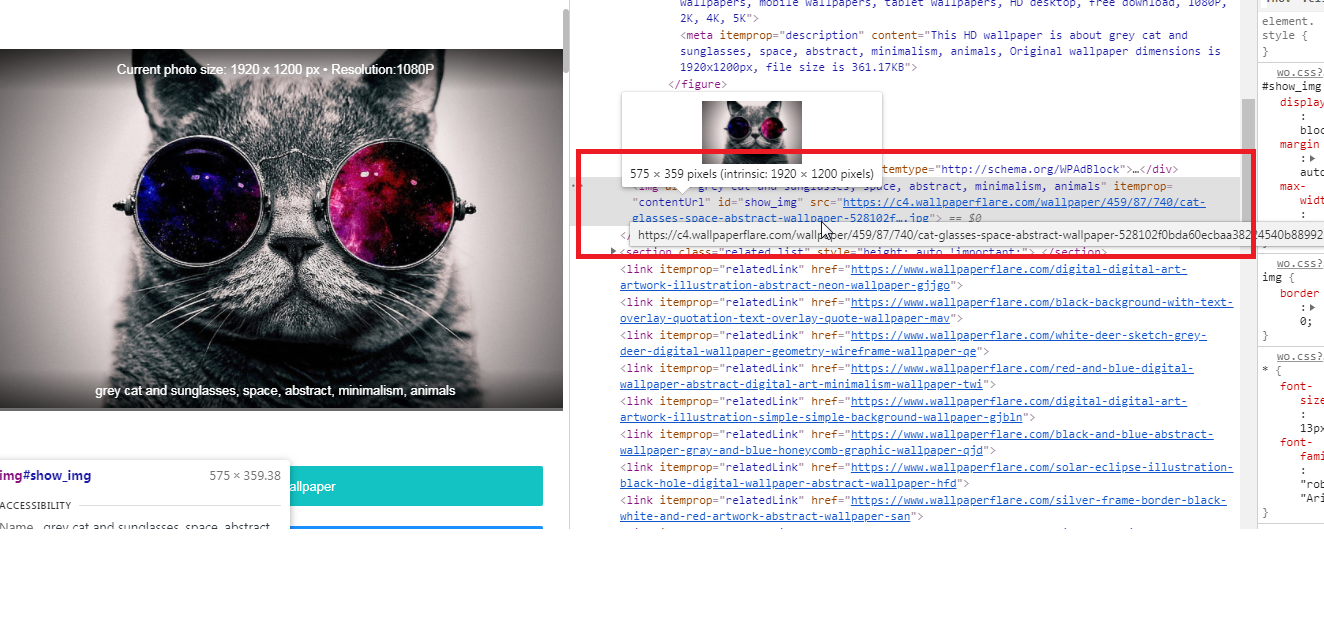

In [8]:
download_list=[]
for i in url_list:
  img_url1=i+'/download/'
  soup1 = bs(requests.get(img_url1).content, "html5lib")
  finalimg_url=soup1.find("img",{'itemprop':'contentUrl'})['src']
  download_list.append(finalimg_url)
download_list

['https://c4.wallpaperflare.com/wallpaper/88/698/360/space-black-hole-interstellar-planet-wallpaper-7806ed3840100c9880ac114e1852449a.jpg',
 'https://c4.wallpaperflare.com/wallpaper/1023/915/631/nasa-space-suit-digital-art-space-wallpaper-d9b0d87dd1fadddb462798dfa0c1e69d.jpg',
 'https://c4.wallpaperflare.com/wallpaper/268/183/676/black-holes-interstellar-movie-wallpaper-5f0532ec3e463cfbd5fc68e2a1513424.jpg',
 'https://c4.wallpaperflare.com/wallpaper/676/38/567/interstellar-movie-wallpaper-98f68cdadfeca7595e80b9c2d2492b50.jpg',
 'https://c4.wallpaperflare.com/wallpaper/1002/423/715/space-black-holes-interstellar-movie-wallpaper-2920f8fdf1bafd3b1657b89f207176ed.jpg',
 'https://c4.wallpaperflare.com/wallpaper/638/16/939/space-interstellar-movie-planet-black-holes-wallpaper-79a0f8dd81ba5dab66e7e84f1081e69d.jpg',
 'https://c4.wallpaperflare.com/wallpaper/527/320/1017/interstellar-movie-movies-astronaut-sea-wallpaper-08365db800001c38205cf1be2892643a.jpg',
 'https://c4.wallpaperflare.com/wallp

### **Finally we download the images using the URLS of the images we obtained**

In [9]:
i=0
while i<len(download_list):
  response = requests.get(download_list[i])

  file = open(str(i)+".png", "wb")
  file.write(response.content)
  i+=1